In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import impute
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [133]:
data_set = pd.read_csv("suv_data.csv")
data_set.head(), data_set.shape

(    User ID  Gender  Age  EstimatedSalary  Purchased
 0  15624510    Male   19            19000          0
 1  15810944    Male   35            20000          0
 2  15668575  Female   26            43000          0
 3  15603246  Female   27            57000          0
 4  15804002    Male   19            76000          0,
 (400, 5))

In [116]:
data_set.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

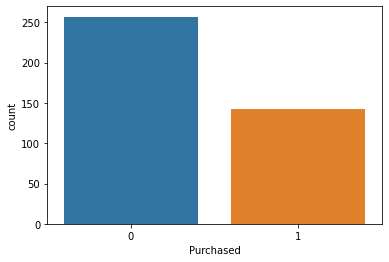

In [117]:
X = data_set["Purchased"].values
sns.countplot(x="Purchased", data=data_set)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

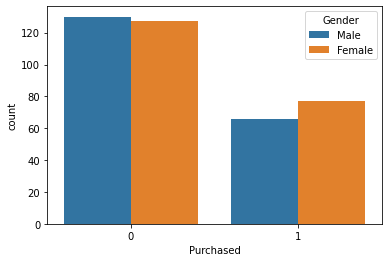

In [118]:
sns.countplot(x="Purchased" , hue="Gender", data=data_set)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

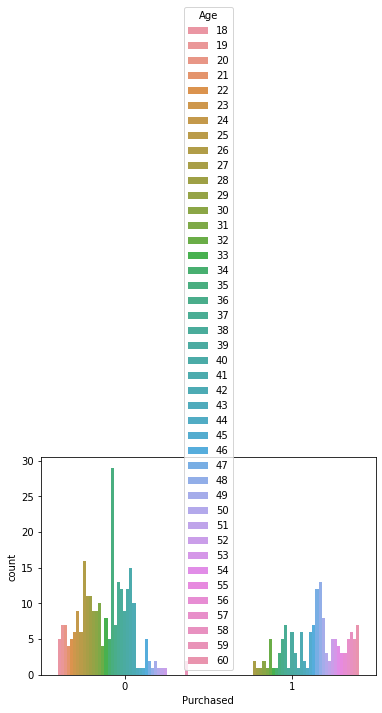

In [119]:
sns.countplot(x="Purchased", hue="Age", data=data_set)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

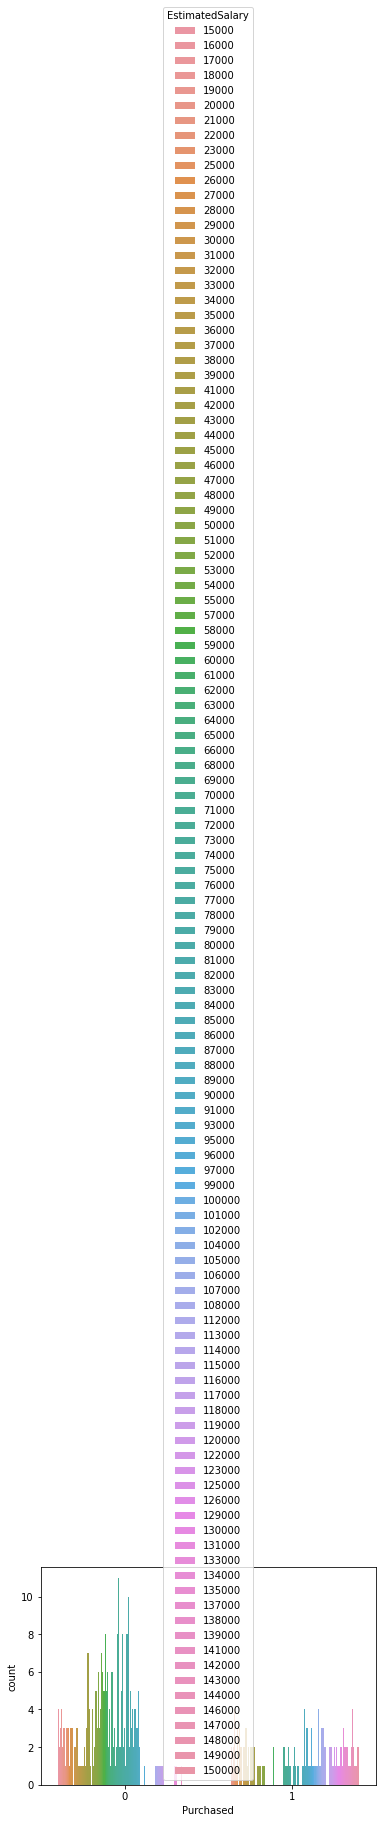

In [120]:
sns.countplot(x="Purchased", hue="EstimatedSalary", data=data_set)

In [121]:
#OBSERVATION:The category of people who will buy this new suv are females,between the age of 51 and 52 with estimated salray between 95,000-150,000

In [122]:
gender = pd.get_dummies(data_set['Gender'], drop_first=True)
gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [123]:
data_set = pd.concat([data_set,gender], axis=1)
data_set.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [124]:
data_set = data_set.drop(['Gender', 'User ID'], axis='columns')
data_set.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [125]:
X = data_set.iloc[:,[0,1]].values
y = data_set.iloc[:,2].values
#iloc() function can retrive a particular value belonging to a row and column using the index values assigned to it. It only accepts integer values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [127]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [128]:
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [129]:
confusion_matrix(y_test, y_pred)

array([[52,  6],
       [16, 26]], dtype=int64)

In [132]:
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)*100

78.0